# Differential method

In [192]:
%reset -f

###### 1. Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

###### 2. Import data
input_file = 'differential_data.xlsx'
data = pd.read_excel(input_file, sheet_name='Data').astype(float)

tau = data['tau'].to_numpy()
C_A_0 = data['C_A_0'].to_numpy()
C_B_0 = data['C_B_0'].to_numpy()
C_C_0  = data['C_C_0'].to_numpy()
C_A = data['C_A'].to_numpy()
C_B = data['C_B'].to_numpy()
C_C  = data['C_C'].to_numpy()
T = data['T'].to_numpy()

T = T + 273

###### 3. Define stoichometry
nu = np.array([[-1,-2,1]])

###### 4. Calculate production rates
R_A = (C_A - C_A_0) / tau
R_B = (C_B - C_B_0) / tau
R_C = (C_C - C_C_0) / tau

R = np.vstack((R_A,R_B,R_C))

###### 4. Calculate reaction rates through regression
r = np.linalg.multi_dot([np.linalg.inv(np.dot(nu,nu.T)),nu,R])
print('Reaction rates from C_A:\n',-R_A,'\n')
print('Reaction rates from C_B:\n',-(R_B/2),'\n')
print('Reaction rates from C_B:\n',R_C,'\n')
print('Reaction rates from LS:\n',r)

###### Display dataframe to help choose data for analyses
data

Reaction rates from C_A:
 [0.16902706 0.0379257  0.1242887  0.20884721 0.26804387 0.00241517
 0.06282668 0.31502556 0.78028219 0.0258092  0.06286172 0.36622922
 0.78391427 0.15174951 0.16255234 0.13943451 0.16911987] 

Reaction rates from C_B:
 [0.1747514  0.04245295 0.12687292 0.17799478 0.24899647 0.00239535
 0.07092464 0.29853993 0.77778928 0.02383188 0.06279645 0.38911855
 0.85947227 0.16300212 0.16816328 0.13670348 0.16115578] 

Reaction rates from C_B:
 [0.1528081  0.03725058 0.12674987 0.19282768 0.26528338 0.00271738
 0.06329906 0.32012113 0.76033888 0.02768245 0.06566863 0.32831878
 0.72960695 0.1660564  0.17509445 0.13776555 0.15647102] 

Reaction rates from LS:
 [[0.17014013 0.04083135 0.12642171 0.18560901 0.25488552 0.00245233
  0.06830405 0.3048844  0.77529637 0.02480319 0.06328602 0.37517037
  0.82523505 0.16163574 0.16838332 0.13733566 0.16170233]]


,tau,C_A_0,C_B_0,C_C_0,T,C_A,C_B,C_C
0,0.1,2.0,2.0,0.0,100.0,1.983097,1.965050,0.015281
1,0.1,0.5,2.0,0.0,100.0,0.496207,1.991509,0.003725
2,0.1,1.5,2.0,0.0,100.0,1.487571,1.974625,0.012675
3,0.1,2.5,2.0,0.0,100.0,2.479115,1.964401,0.019283
4,0.1,3.5,2.0,0.0,100.0,3.473196,1.950201,0.026528
5,0.1,2.0,0.5,0.0,100.0,1.999758,0.499521,0.000272
6,0.1,2.0,1.5,0.0,100.0,1.993717,1.485815,0.006330
7,0.1,2.0,2.5,0.0,100.0,1.968497,2.440292,0.032012
8,0.1,2.0,3.5,0.0,100.0,1.921972,3.344442,0.076034
9,0.1,2.0,2.0,0.0,80.0,1.997419,1.995234,0.002768


n_A =  0.946
n_B =  2.977


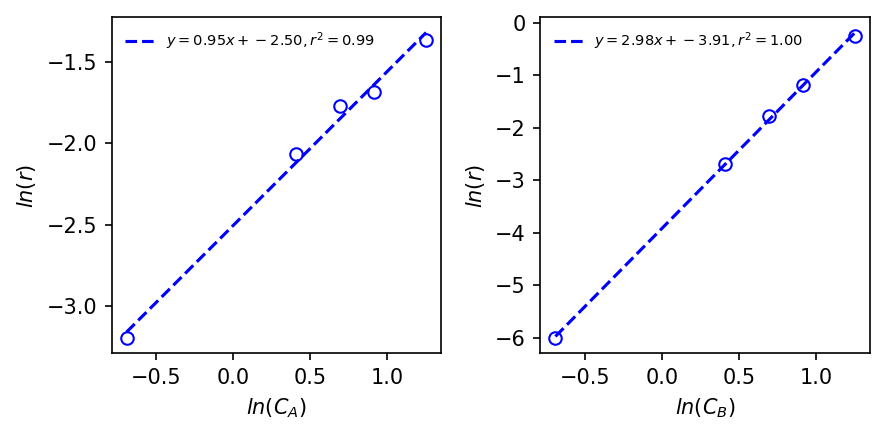

In [193]:
###### Determining rate orders

### nA
nA_data = [0,1,2,3,4]
r_nA = r[:,nA_data][0]
C_A_0_nA = C_A_0[nA_data]

m_A,b_A,rval_A,p_A,se_A = stats.linregress(np.log(C_A_0_nA),np.log(r_nA))
n_A = m_A

print('n_A = ','{:.3f}'.format(n_A))

x_fit_nA = np.linspace(np.min(np.log(C_A_0_nA)),np.max(np.log(C_A_0_nA)),101)
y_fit_nA = m_A * x_fit_nA + b_A

### nB
nB_data = [0,5,6,7,8]
r_nB = r[:,nB_data][0]
C_B_0_nB = C_B_0[nB_data]

m_B,b_B,rval_B,p_B,se_B = stats.linregress(np.log(C_B_0_nB),np.log(r_nB))
n_B = m_B

print('n_B = ','{:.3f}'.format(n_B))

x_fit_nB = np.linspace(np.min(np.log(C_B_0_nB)),np.max(np.log(C_B_0_nB)),101)
y_fit_nB = m_B * x_fit_nB + b_B

### Display fitted results

fig = plt.figure(figsize=(6,3), dpi=150)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m_A,b_A,rval_A**2))+"$"
ax1.plot(np.log(C_A_0_nA),np.log(r_nA),'ob',mfc='none')
ax1.plot(x_fit_nA,y_fit_nA,'--b',label=ax1lab)
ax1.legend(loc='upper left',fontsize=7,frameon=False)
ax1.set_xlabel('$ln(C_A)$')
ax1.set_ylabel('$ln(r)$')

ax2lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m_B,b_B,rval_B**2))+"$"
ax2.plot(np.log(C_B_0_nB),np.log(r_nB),'ob',mfc='none')
ax2.plot(x_fit_nB,y_fit_nB,'--b',label=ax2lab)
ax2.legend(loc='upper left',fontsize=7,frameon=False)
ax2.set_xlabel('$ln(C_B)$')
ax2.set_ylabel('$ln(r)$')

plt.tight_layout()
plt.show()

k =  0.009 mol / L s


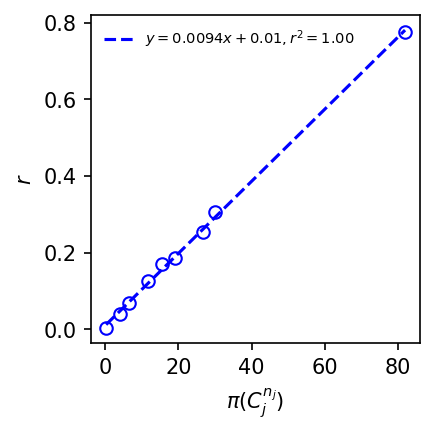

In [194]:
###### Determining rate constants
k_data = [0,1,2,3,4,5,6,7,8]
n_A = 0.97
n_B = 2.98

C_prod = C_A_0**n_A * C_B_0**n_B

C_prod_k = C_prod[k_data]
r_k      = r[:,k_data][0]

m_k,b_k,rval_k,p_k,se_k = stats.linregress(C_prod_k,r_k)
k = m_k

print('k = ','{:.3f}'.format(k),'mol / L s')

x_fit_k = np.linspace(np.min(C_prod_k),np.max(C_prod_k),101)
y_fit_k = m_k * x_fit_k + b_k

### Display fitted results

fig = plt.figure(figsize=(3,3), dpi=150)
ax1 = plt.subplot(111)

ax1lab="$"+('y=%2.4fx+%2.2f, r^2=%1.2f'%(m_k,b_k,rval_k**2))+"$"
ax1.plot(C_prod_k,r_k,'ob',mfc='none')
ax1.plot(x_fit_k,y_fit_k,'--b',label=ax1lab)
ax1.legend(loc='upper left',fontsize=7,frameon=False)
ax1.set_xlabel(r'$\pi(C_j^{n_j})$')
ax1.set_ylabel('$r$')

plt.tight_layout()
plt.show()

Ea =  101.467 kJ / mol
k0   1.678e+12 mol / L s


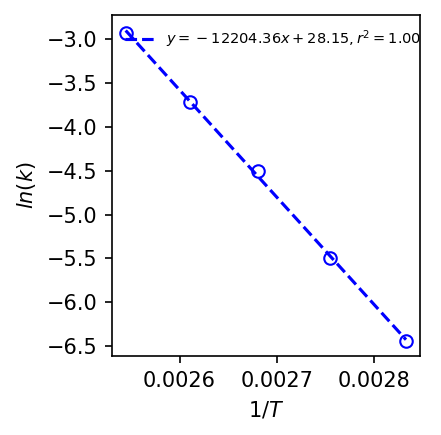

In [195]:
###### Determining activation energy: method 1

T_data = [0,9,10,11,12]

C_prod = C_A_0**n_A * C_B_0**n_B

r_T = r[:,T_data][0]
T_T = T[T_data]
C_prod_T = C_prod[T_data]

k_T = r_T / C_prod_T

m_T,b_T,rval_T,p_T,se_T = stats.linregress(T_T**-1,np.log(k_T))
Ea = - m_T * 8.314 / 1000
k0 = np.exp(b_T)

print('Ea = ','{:.3f}'.format(Ea),'kJ / mol')
print('k0  ','{:.3e}'.format(k0),'mol / L s')

x_fit_T = np.linspace(np.min(T_T**-1),np.max(T_T**-1),101)
y_fit_T = m_T * x_fit_T + b_T

### Display fitted results

fig = plt.figure(figsize=(3,3), dpi=150)
ax1 = plt.subplot(111)

ax1lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m_T,b_T,rval_T**2))+"$"
ax1.plot(T_T**-1,np.log(k_T),'ob',mfc='none')
ax1.plot(x_fit_T,y_fit_T,'--b',label=ax1lab)
ax1.legend(loc='upper left',fontsize=7,frameon=False)
ax1.set_xlabel('$1/T$')
ax1.set_ylabel('$ln(k)$')

plt.tight_layout()
plt.show()

Ea =  101.467 kJ / mol
k0   1.678e+12 mol / L s


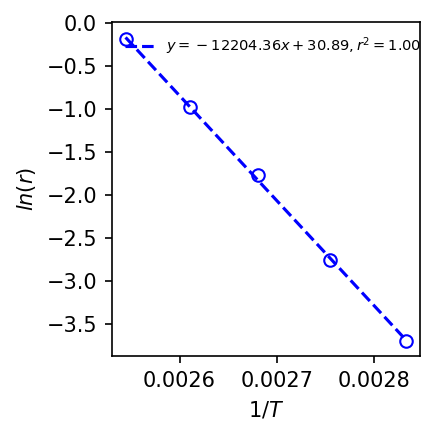

In [196]:
###### Determining activation energy: method 2

T_data = [0,9,10,11,12]

C_prod = C_A_0**n_A * C_B_0**n_B

r_T = r[:,T_data][0]
T_T = T[T_data]
C_prod_T = C_prod[T_data]

m_Tb,b_Tb,rval_Tb,p_Tb,se_Tb = stats.linregress(T_T**-1,np.log(r_T))
Ea_b = - m_Tb * 8.314 / 1000
k0 = np.exp(b_Tb) / C_prod_T[0]

print('Ea = ','{:.3f}'.format(Ea_b),'kJ / mol')
print('k0  ','{:.3e}'.format(k0),'mol / L s')

x_fit_Tb = np.linspace(np.min(T_T**-1),np.max(T_T**-1),101)
y_fit_Tb = m_Tb * x_fit_Tb + b_Tb

### Display fitted results

fig = plt.figure(figsize=(3,3), dpi=150)
ax1 = plt.subplot(111)

ax1lab="$"+('y=%2.2fx+%2.2f, r^2=%1.2f'%(m_Tb,b_Tb,rval_Tb**2))+"$"
ax1.plot(T_T**-1,np.log(r_T),'ob',mfc='none')
ax1.plot(x_fit_Tb,y_fit_Tb,'--b',label=ax1lab)
ax1.legend(loc='upper left',fontsize=7,frameon=False)
ax1.set_xlabel('$1/T$')
ax1.set_ylabel('$ln(r)$')

plt.tight_layout()
plt.show()

SSR = 2.989e-01

     Value  95% CI Half Width  95% CI Half Width Rel %
b1  1.253              2.000                  159.633
b2  0.063              0.100                  160.033
b3  0.040              0.071                  177.858
b4  0.112              0.173                  154.188
b5  1.191              1.929                  161.948 



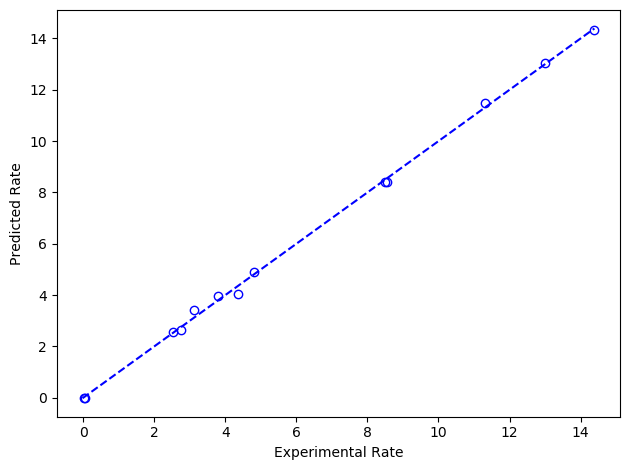

In [199]:
###### Non-linear regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t as tdist

###### Data

rate_exp = [8.55,3.79,4.82,0.02,2.75,14.39,2.54,4.35,13,8.5,0.05,11.32,3.13]
CA_exp = [470,285,470,470,470,100,100,470,100,100,100,285,285]
CB_exp = [300,80,300,80,80,190,80,190,300,300,80,300,190]
CC_exp = [10,10,120,120,10,10,65,65,54,120,120,10,120]

ndpts = len(rate_exp)

###### Model

def model(x,*parameters):
    
    ### Indepdendent variables
    CA = x[0,:]
    CB = x[1,:]
    CC = x[2,:]
    ndtps = len(CA)
    
    ### Parameters to be fit
    b1 = parameters[0]
    b2 = parameters[1]
    b3 = parameters[2]
    b4 = parameters[3]
    b5 = parameters[4]
    
    ### Calculate output value for each data point based on a model
    rate_model = np.zeros(ndpts)
    for i in range(ndpts):
        rate_model[i] = (b1*CB[i]-CC[i]/b5)/(1+b2*CA[i]+b3*CB[i]+b4*CC[i])  # Manually write the rate expression
    return rate_model

###### Run regression

### Parameter guesses
b1_g = 1
b2_g = 0.1
b3_g = 0.1
b4_g = 0.1
b5_g = 1
guess = [b1_g,b2_g,b3_g,b4_g,b5_g]
npars = len(guess)

### Regression
xvars = np.array([CA_exp,CB_exp,CC_exp])
popt,pcov = curve_fit(model,xvars,rate_exp,guess,method='lm')

### Confidence intervals
alpha = 0.05 # 95% confidence interval
dof = max(0,ndpts-npars) # number of degrees of freedom

tval = tdist.ppf(1.0-alpha/2.0,dof) # student t value for the dof and confidence level

ci = np.zeros([npars,2])
for i,p,var in zip(range(ndpts),popt,np.diag(pcov)):
    sigma = var**0.5
    ci[i,:] = [p-sigma*tval,p+sigma*tval]
ci_width = ci[:,1]-ci[:,0]

### Create output dataframe
param_names = ['b1','b2','b3','b4','b5']
b1,b2,b3,b4,b5 = popt
soln = pd.DataFrame(popt,index=param_names,columns=['Value'])
soln['95% CI Half Width'] = ci_width/2
soln['95% CI Half Width Rel %'] = ci_width/2/popt*100

### Generate matrix containing simulated rates and calculate the sum of squared residuals (ssr)
rate_predict = np.zeros(ndpts)
ssr = 0
for i in range(ndpts):
    rate_predict[i]=(b1*CB_exp[i]-CC_exp[i]/b5)/(1+b2*CA_exp[i]+b3*CB_exp[i]+b4*CC_exp[i])
    sqr_resid = (rate_predict[i]-rate_exp[i])**2
    ssr = ssr + sqr_resid
print('SSR = ' + "{:.3e}".format(ssr))

pd.options.display.float_format = "{:,.3f}".format
print('\n', soln, '\n')

###### Parity plots

###### Parity line
x_parity = [min([min(rate_exp),min(rate_predict)]),max([max(rate_exp),max(rate_predict)])]
y_parity = [min([min(rate_exp),min(rate_predict)]),max([max(rate_exp),max(rate_predict)])]
    
###### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(rate_exp,rate_predict,'ob',mfc='none')
ax1.plot(x_parity,y_parity,'--b')
ax1.set_xlabel('Experimental Rate')
ax1.set_ylabel('Predicted Rate')

fig.tight_layout()

plt.show()